In [1]:
import pandas as pd
from fbprophet import Prophet

In [2]:
PATH = "../Data/BeerWineLiquor.csv"

df = pd.read_csv(PATH)

In [3]:
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    324 non-null    object
 1   beer    324 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [5]:
df.columns = ['ds', 'y']

In [6]:
df.head()

,ds,y
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [7]:
df['ds'] = pd.to_datetime(df['ds'])

In [8]:
df.head()

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


In [9]:
df.tail()

,ds,y
319,2018-08-01,4898
320,2018-09-01,4598
321,2018-10-01,4737
322,2018-11-01,5130
323,2018-12-01,6370


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      324 non-null    datetime64[ns]
 1   y       324 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.2 KB


In [11]:
m = Prophet()

m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
future = m.make_future_dataframe(periods=24, freq='MS')

In [13]:
future.tail()

,ds
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01
347,2020-12-01


In [14]:
forecast = m.predict(future)

In [15]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1778.715353,1154.817322,1470.050350,1778.715353,1778.715353,-462.190276,-462.190276,-462.190276,-462.190276,-462.190276,-462.190276,0.0,0.0,0.0,1316.525077
1,1992-02-01,1781.314460,1194.907065,1517.260254,1781.314460,1781.314460,-428.338761,-428.338761,-428.338761,-428.338761,-428.338761,-428.338761,0.0,0.0,0.0,1352.975698
2,1992-03-01,1783.745882,1443.181743,1769.188546,1783.745882,1783.745882,-179.583331,-179.583331,-179.583331,-179.583331,-179.583331,-179.583331,0.0,0.0,0.0,1604.162551
3,1992-04-01,1786.344989,1428.224394,1745.159882,1786.344989,1786.344989,-196.439274,-196.439274,-196.439274,-196.439274,-196.439274,-196.439274,0.0,0.0,0.0,1589.905715
4,1992-05-01,1788.860254,1665.373378,1981.572907,1788.860254,1788.860254,45.228728,45.228728,45.228728,45.228728,45.228728,45.228728,0.0,0.0,0.0,1834.088982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2020-08-01,5203.524785,5081.732308,5406.521747,5191.229956,5215.719404,40.954046,40.954046,40.954046,40.954046,40.954046,40.954046,0.0,0.0,0.0,5244.478832
344,2020-09-01,5219.662692,4932.026841,5250.682883,5205.918570,5232.821110,-132.106790,-132.106790,-132.106790,-132.106790,-132.106790,-132.106790,0.0,0.0,0.0,5087.555902
345,2020-10-01,5235.280022,5034.480952,5355.259929,5220.566892,5249.415353,-43.013801,-43.013801,-43.013801,-43.013801,-43.013801,-43.013801,0.0,0.0,0.0,5192.266221
346,2020-11-01,5251.417929,5181.049849,5506.459423,5235.646920,5267.056953,85.925864,85.925864,85.925864,85.925864,85.925864,85.925864,0.0,0.0,0.0,5337.343793


In [16]:
forecast[['ds', 'yhat_lower', 'yhat_upper', 'yhat']].tail(12)

,ds,yhat_lower,yhat_upper,yhat
336,2020-01-01,4470.805845,4777.538309,4630.451471
337,2020-02-01,4521.983923,4842.349378,4680.440893
338,2020-03-01,4782.671719,5100.029743,4944.293075
339,2020-04-01,4786.722754,5112.193489,4943.575038
340,2020-05-01,5028.656634,5359.944552,5200.860370
341,2020-06-01,5011.227746,5343.313814,5182.420269
342,2020-07-01,5142.285943,5471.428584,5315.399291
343,2020-08-01,5081.732308,5406.521747,5244.478832
344,2020-09-01,4932.026841,5250.682883,5087.555902
345,2020-10-01,5034.480952,5355.259929,5192.266221


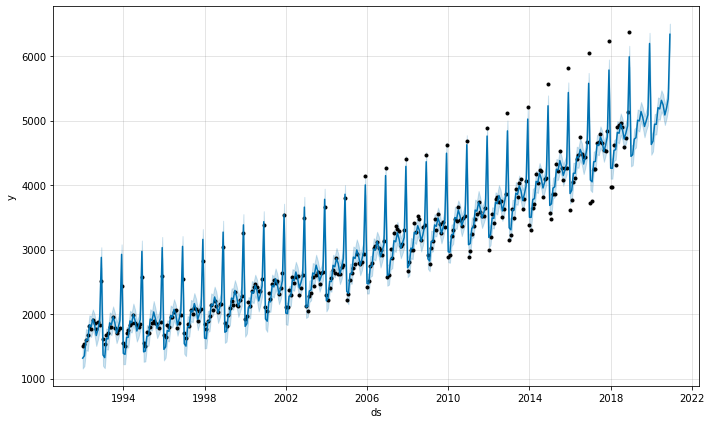

In [17]:
m.plot(forecast);

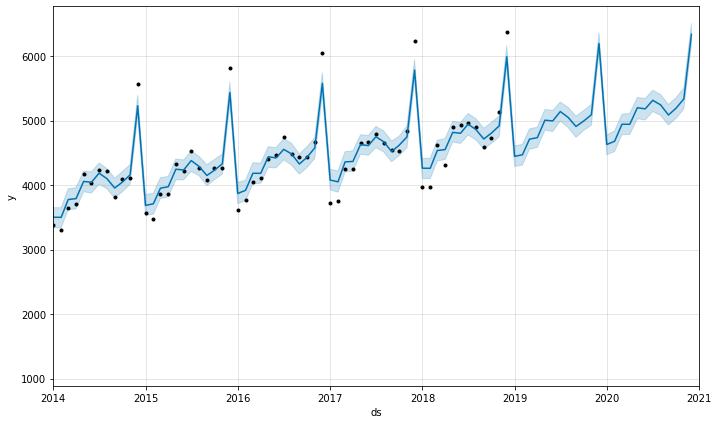

In [18]:
pd.plotting.register_matplotlib_converters()

import matplotlib.pyplot as plt
m.plot(forecast)
plt.xlim(['2014-01-01', '2021-01-01']);

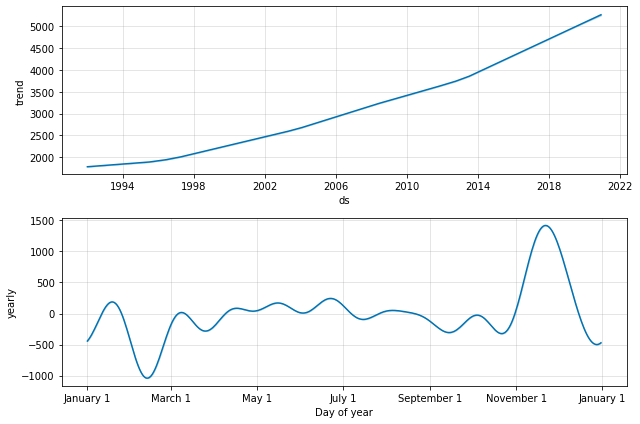

In [19]:
m.plot_components(forecast);